
# Assignment 3  <font color="blue"> (15 points) </font>
 
------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2021-11-07

**Course Number:** YCBS 255 - Statistical Machine Learning

------

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Question A1: Generate x1 array.
x1 = np.linspace(-20, 20, 100)

In [3]:
# Question A1: Generate x2, x3, x4, x5 array.
x1 = np.linspace(-20, 20, 100)
x_list = [x1]
x_range = np.arange(2,6)
for value in x_range:
  x_value = np.power(x1, value)
  x_list.append(x_value)
x2 = x_list[1]
x3 = x_list[2]
x4 = x_list[3]
x5 = x_list[4]
X = pd.DataFrame(x_list, index = ['x1', 'x2', 'x3', 'x4', 'x5']).transpose().to_numpy()

In [4]:
# Question A2: Generate 'y' function.
np.random.seed(12)
mu = 0
sigma = math.sqrt(4)
eps = np.random.normal(mu, sigma, 100)
y = 1.75 + 5*x1 + 0.05*x3 -10.3*x5 + eps

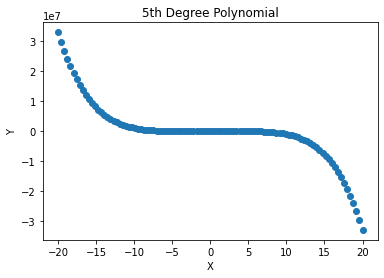

In [5]:
# Question A2: Plot polynomial.
plt.scatter(x1, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('5th Degree Polynomial')
plt.show()

In [7]:
# Question A3: Using  5-fold cross-validation, train a lasso model including with 10 different tunning parameters. 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
k = 5
kf = KFold(n_splits = k, random_state = 12, shuffle = True)
tunning_para_list = [0.05, 0.1, 1, 5, 50, 500, 2500, 10000]
lasso_avg_mse_list = []
for tunning_para in tunning_para_list:
  lasso_regression = Lasso(alpha = tunning_para)
  lasso_mse_list = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_regression.fit(X_train, y_train)
    y_pred = lasso_regression.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred)
    lasso_mse_list.append(mse_lasso)
    print(lasso_regression.coef_)
  lasso_avg_mse = sum(lasso_mse_list)/len(lasso_mse_list)
  lasso_avg_mse_list.append(lasso_avg_mse)
print(lasso_avg_mse_list)

[ 5.52965206e+01  4.98208024e-01 -4.88538558e-01 -1.22317619e-03
 -1.02988817e+01]
[ 5.15683208e+01 -4.82412550e-01 -4.28439513e-01  1.21663709e-03
 -1.02990146e+01]
[ 2.96203885e+01  8.37638578e-02 -1.92599005e-01 -2.17064447e-04
 -1.02995073e+01]
[ 1.10147462e+01 -5.95538097e-02 -1.09897617e-02  1.66767381e-04
 -1.02998722e+01]
[ 7.64616272e+00  2.50521491e-02  2.19426404e-02 -8.53688934e-05
 -1.02999395e+01]
[ 5.52893154e+01  4.98144179e-01 -4.88472167e-01 -1.22301861e-03
 -1.02988819e+01]
[ 5.15612336e+01 -4.82342046e-01 -4.28376807e-01  1.21645399e-03
 -1.02990148e+01]
[ 2.96130535e+01  8.36931506e-02 -1.92535472e-01 -2.16872064e-04
 -1.02995074e+01]
[ 1.10074677e+01 -5.94768225e-02 -1.09252920e-02  1.66557579e-04
 -1.02998724e+01]
[ 7.63902198e+00  2.49810632e-02  2.20077769e-02 -8.51572211e-05
 -1.02999397e+01]
[ 5.51596229e+01  4.96994974e-01 -4.87277125e-01 -1.22018204e-03
 -1.02988842e+01]
[ 5.14336629e+01 -4.81072967e-01 -4.27248090e-01  1.21315815e-03
 -1.02990169e+01]
[ 2.

<function matplotlib.pyplot.show>

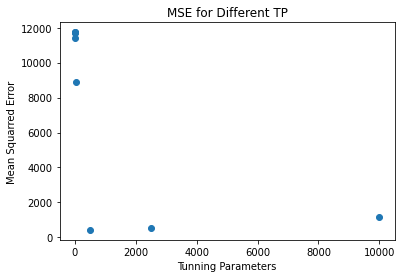

In [ ]:
# Question A4: Plot mse vs tunning parameters.
plt.scatter(tunning_para_list, lasso_avg_mse_list)
plt.xlabel("Tunning Parameters")
plt.ylabel("Mean Squarred Error")
plt.title("MSE for Different TP")
plt.show

## Question A4: The choice of tunning parameter.

By looking at the computed MSE, assuming the best model is based on the one with the lowest MSE, the best tunning parameter among the list would be 500. The MSE was decreasing gradually as the tunning parameter neared 500 but for tunning parameters greated than 500, being 2500 and 10000; the MSE was in fact increasing. Variable selection did start at 500, where the second coefficient was eliminated for all 5 cross-validation versions but only 3 of those folds also had the first coefficient eliminated. However, for the tunning parameters of 2500 and 10000, the first and second coefficients were elimnated for all 5 folds respectively. 

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.



## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  
